# DSC440 Final Project
## Data processing
First, I removed redundant attributes in the dataset. By redundant, it is particularly referred to the attributes that unrelated to the research purpose of this project or attributes that are not applied to most of the respondants (and thus coded as missing). Within the 2018 CFPS adult survey data, there are many attributes that capture the information of survey process. For example, "whether the survey was completed", "whether answered the information about the first full-time job" and "interview year and month". As the attributes do not contain the information related to this project, I removed the attributes from the data. Besides, there are many attributes that are not applied to most of the respondents. For instance, the question asking about the relationship between the interviewee and his or her the fifth child is mostly coded as "not applied" or missing because most of the interviewees do not have that many children. As this project restricts attention on ideology of Chinese adults, the questions asked to children are also removed. In the end, there are 75 attributes in addition to two identification variables under study.

For attributes that have more than 3,000 missing values, I fill the missings with the average value of the same family.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score

In [2]:
#read data
cfps = pd.read_csv('cfps_processed_short.csv')
cfps.head(n=10)
#cfps[["urban18"]].isnull().sum()

,pid,fid18,urban18,gender,age,veteran,fulljob,income,exp_child,exp_son,...,prov30,prov31,marriage1,marriage2,marriage3,marriage4,marriage5,ideology_economic,ideology_political,ideology_social
0,100051501,100051,1.0,0,49.0,NaN,1.0,36000.0,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,5.0
1,100051502,100051,1.0,1,52.0,NaN,1.0,100000.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,10.0,5.0
2,110043107,100051,1.0,1,24.0,0.0,1.0,70000.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,8.0,4.0
3,100160601,100160,1.0,1,29.0,NaN,1.0,100000.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,5.0
4,120009102,100160,1.0,0,27.0,0.0,1.0,70000.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,8.0,3.0
5,130005103,100286,1.0,1,40.0,0.0,1.0,120000.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,3.0
6,100376551,100376,0.0,0,21.0,NaN,1.0,30000.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,10.0,2.0
7,130094103,100376,1.0,1,22.0,0.0,1.0,48000.0,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,6.0,5.0
8,130155103,100435,0.0,1,31.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,9.0,5.0
9,430111101,100453,1.0,1,68.0,NaN,0.0,30000.0,2.0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,10.0,4.0


In [3]:
#summary statistics
cfps[["ideology_economic", "ideology_political", "ideology_social"]].describe()

,ideology_economic,ideology_political,ideology_social
count,32387.000000,29556.000000,30127.000000
mean,2.589002,6.647178,4.115212
std,0.810300,2.795511,1.124098
min,1.000000,0.000000,1.000000
25%,2.000000,5.000000,3.000000
50%,3.000000,7.000000,5.000000
75%,3.000000,9.000000,5.000000
max,5.000000,10.000000,5.000000


In [4]:
# data partition
economic = cfps.iloc[:, 3:105]
economic = pd.DataFrame(economic)

political = cfps.iloc[:, np.r_[3:104, 105]]
political = pd.DataFrame(political)

social = cfps.iloc[:, np.r_[3:104, 106]]
social = pd.DataFrame(social)

In [5]:
#OLS regression
import statsmodels.formula.api as smf

controls1 = "+".join(economic.columns.difference(["ideology_economic"]))
econ_reg = "ideology_economic~" + controls1

controls2 =  "+".join(political.columns.difference(["ideology_political"]))
political_reg = "ideology_political~" + controls2

controls3 =  "+".join(social.columns.difference(["ideology_social"]))
social_reg = "ideology_social~" + controls3

ols_econ = smf.ols(formula = econ_reg,
                data=economic).fit()

ols_poli = smf.ols(formula = political_reg,
                data=political).fit()

ols_social = smf.ols(formula = social_reg,
                data=social).fit()


print(ols_econ.summary())


                            OLS Regression Results                            
Dep. Variable:      ideology_economic   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     15.81
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          5.30e-250
Time:                        16:34:59   Log-Likelihood:                -20847.
No. Observations:               18195   AIC:                         4.189e+04
Df Residuals:                   18095   BIC:                         4.268e+04
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [6]:
#LASSO regression data partition
econ_la = economic.dropna()
x1 = econ_la.iloc[:, :-1]
y1 = econ_la.iloc[:, -1]

pol_la = political.dropna()
x2 = pol_la.iloc[:, :-1]
y2 = pol_la.iloc[:, -1]

social_la = social.dropna()
x3 = social_la.iloc[:, :-1]
y3 = social_la.iloc[:, -1]


In [15]:
#Lasso regression
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=1)
lasso_econ = lasso.fit(x1, y1)
lasso_pol = lasso.fit(x2, y2)
lasso_social = lasso.fit(x3, y3)

lasso_econ.coef_

array([ 0.00000000e+00,  6.31470414e-03,  0.00000000e+00, -0.00000000e+00,
       -3.19896457e-06,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

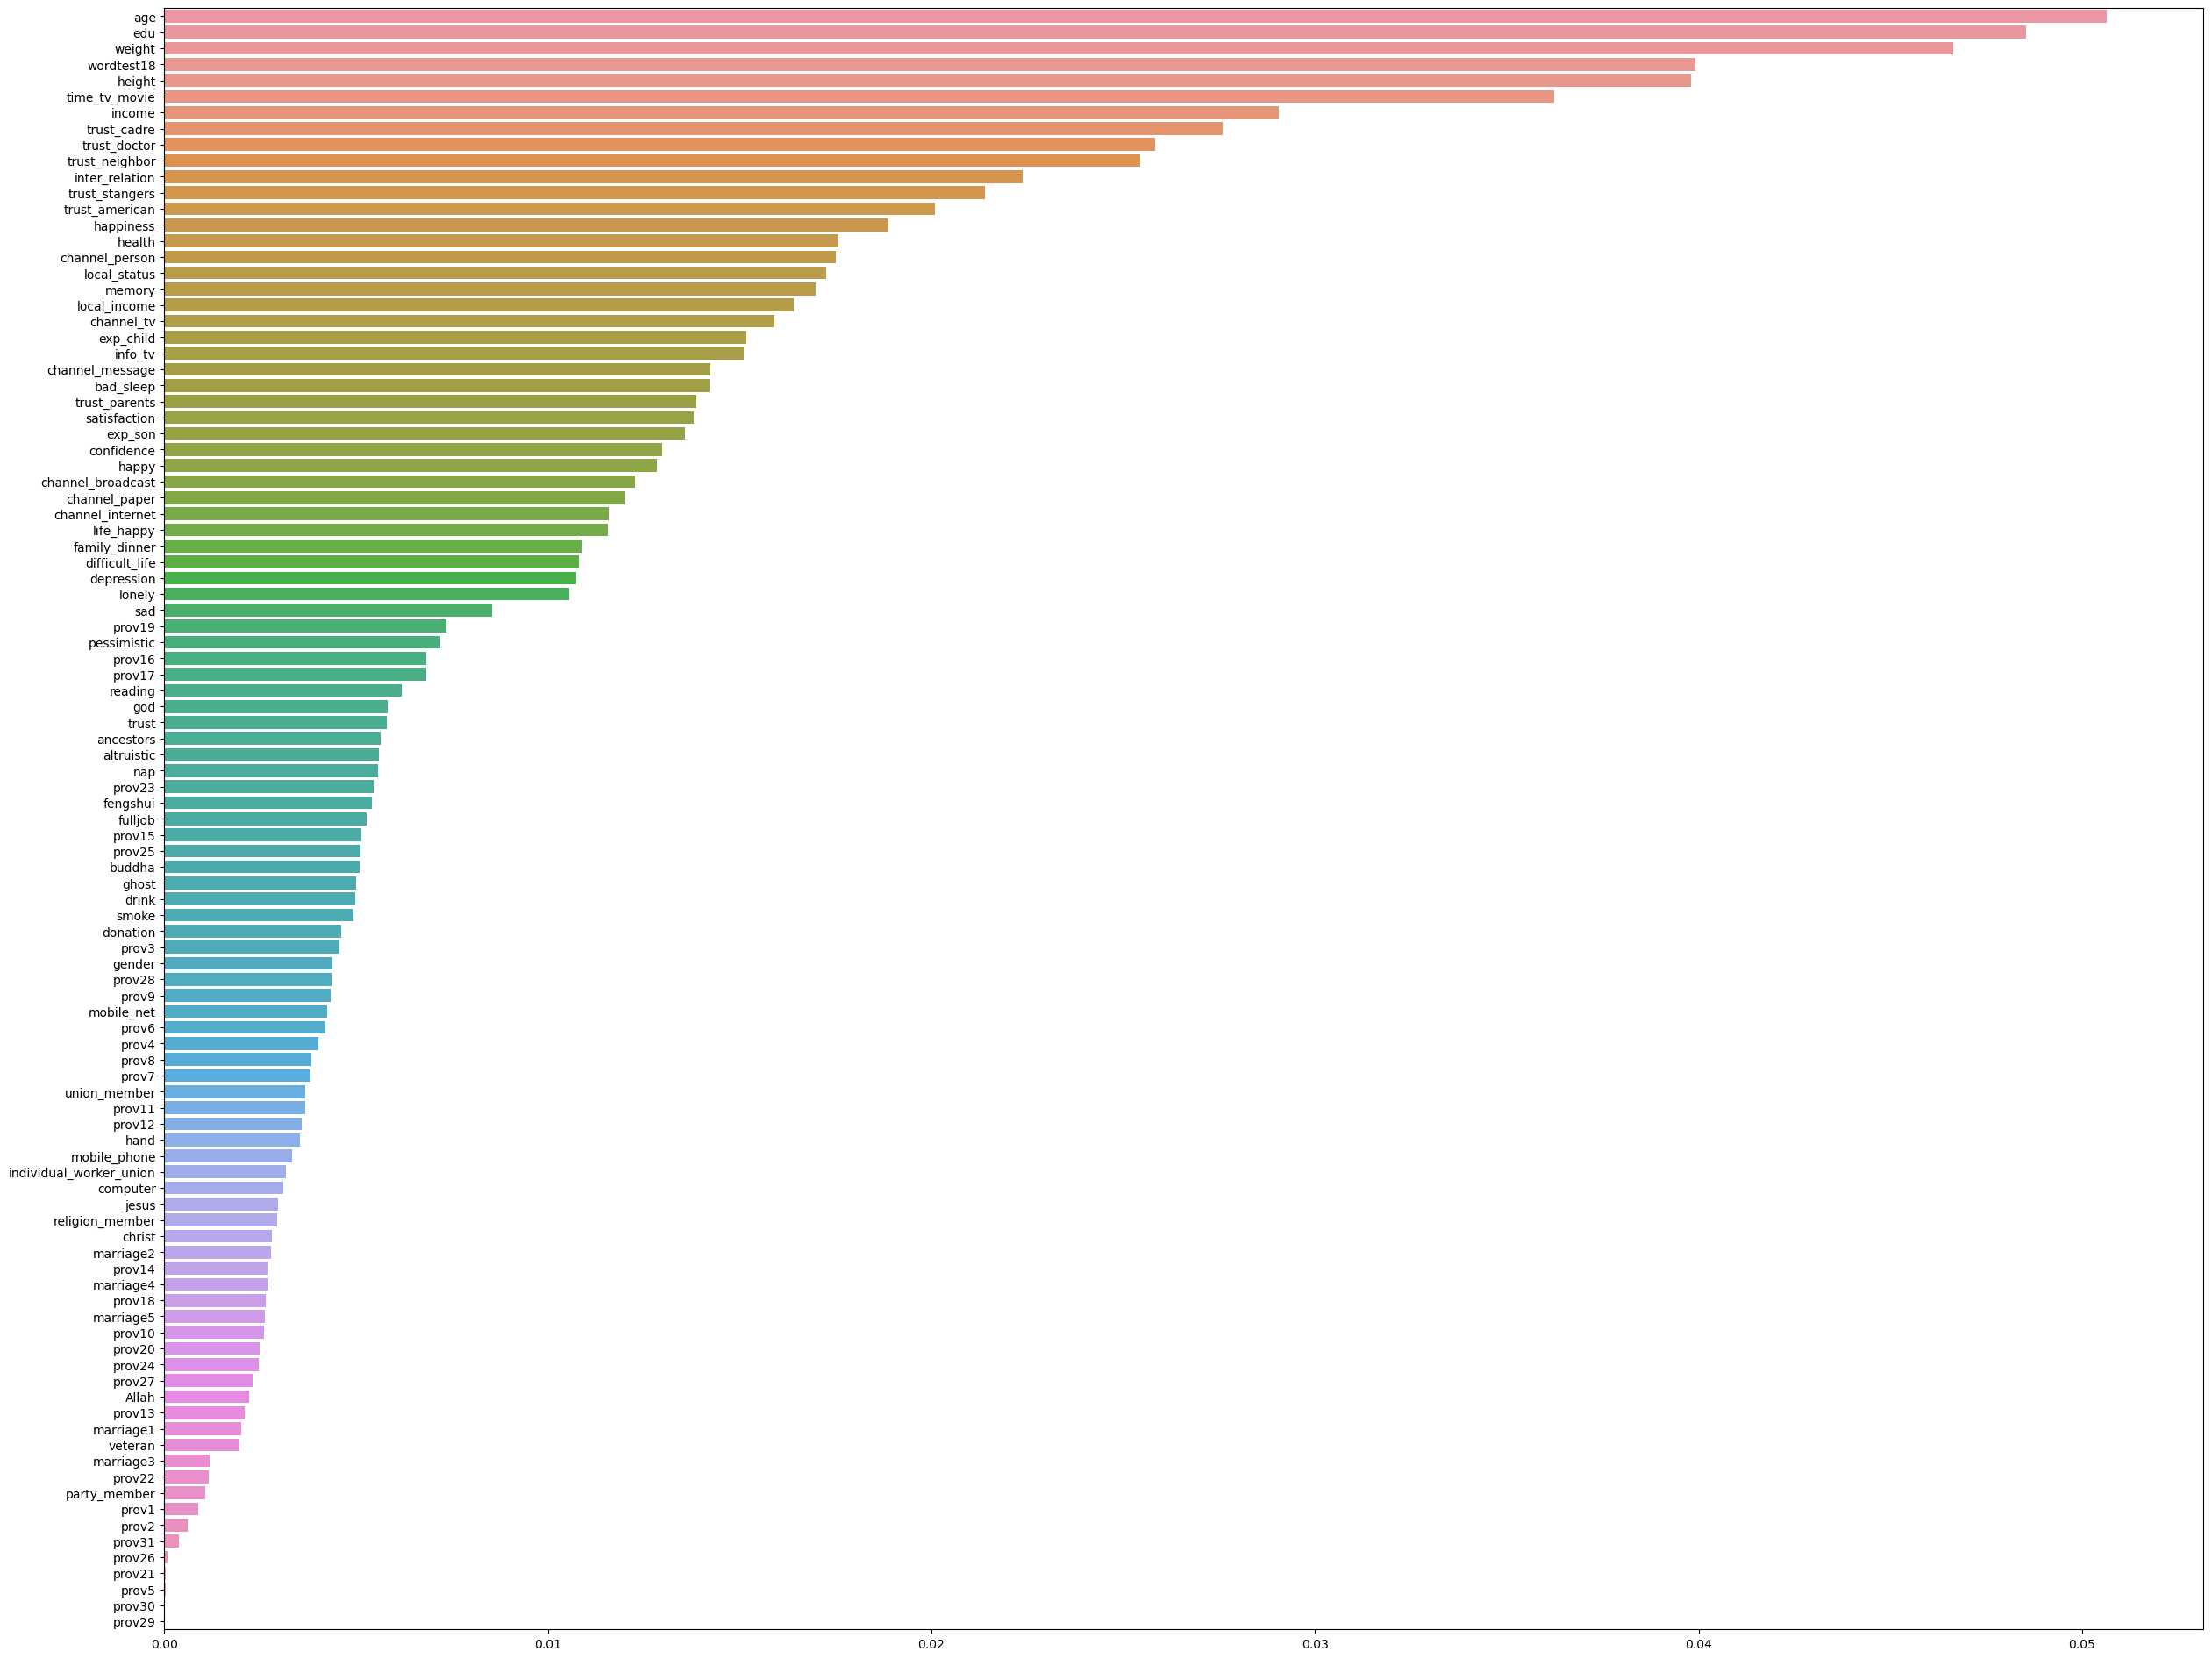

In [8]:
#random forest regression model
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

rf_econ = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_econ.fit(x1, y1)
#rf.feature_importances_
feature_scores1 = pd.Series(rf_econ.feature_importances_, index=x1.columns).sort_values(ascending=False)
f1, ax1 = plt.subplots(figsize=(30, 24))
ax1 = sns.barplot(x=feature_scores1, y=feature_scores1.index)
plt.show()

#plt.barh(x1.columns, rf.feature_importances_)

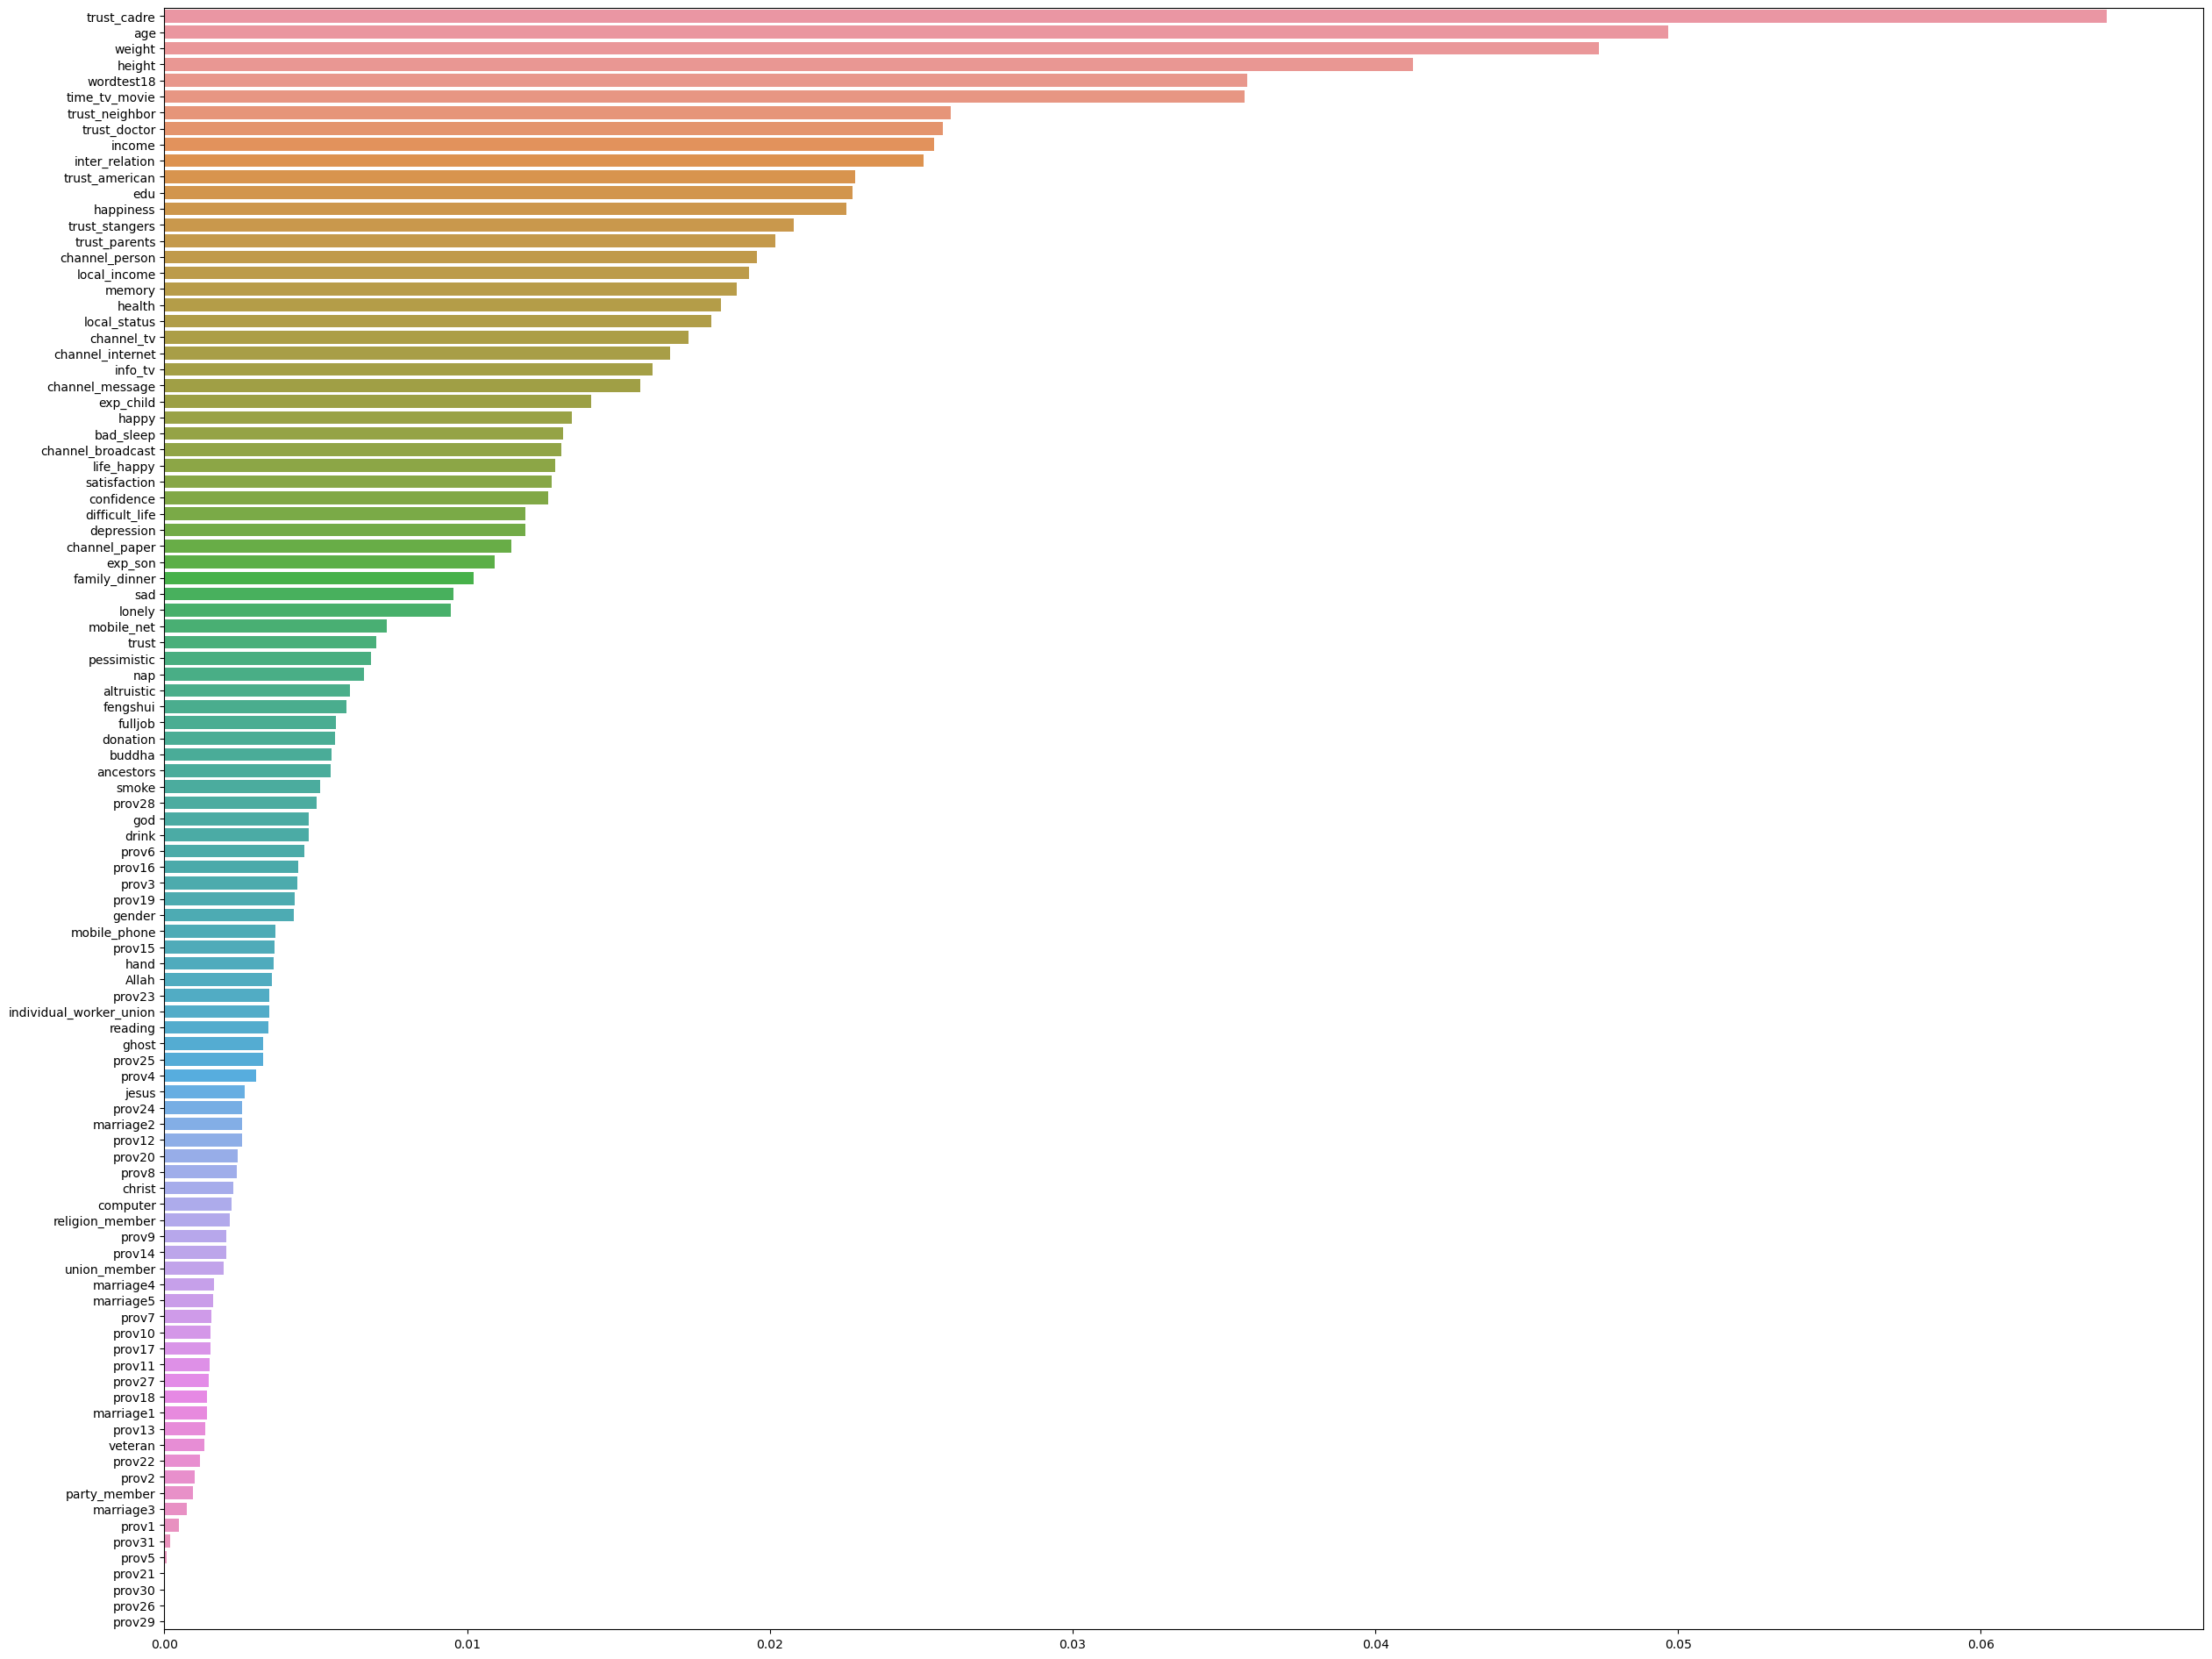

In [10]:
rf_poli = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_poli.fit(x2, y2)
#rf.feature_importances_
feature_scores2 = pd.Series(rf_poli.feature_importances_, index=x2.columns).sort_values(ascending=False)
f2, ax2 = plt.subplots(figsize=(30, 24))
ax2 = sns.barplot(x=feature_scores2, y=feature_scores2.index)
plt.show()

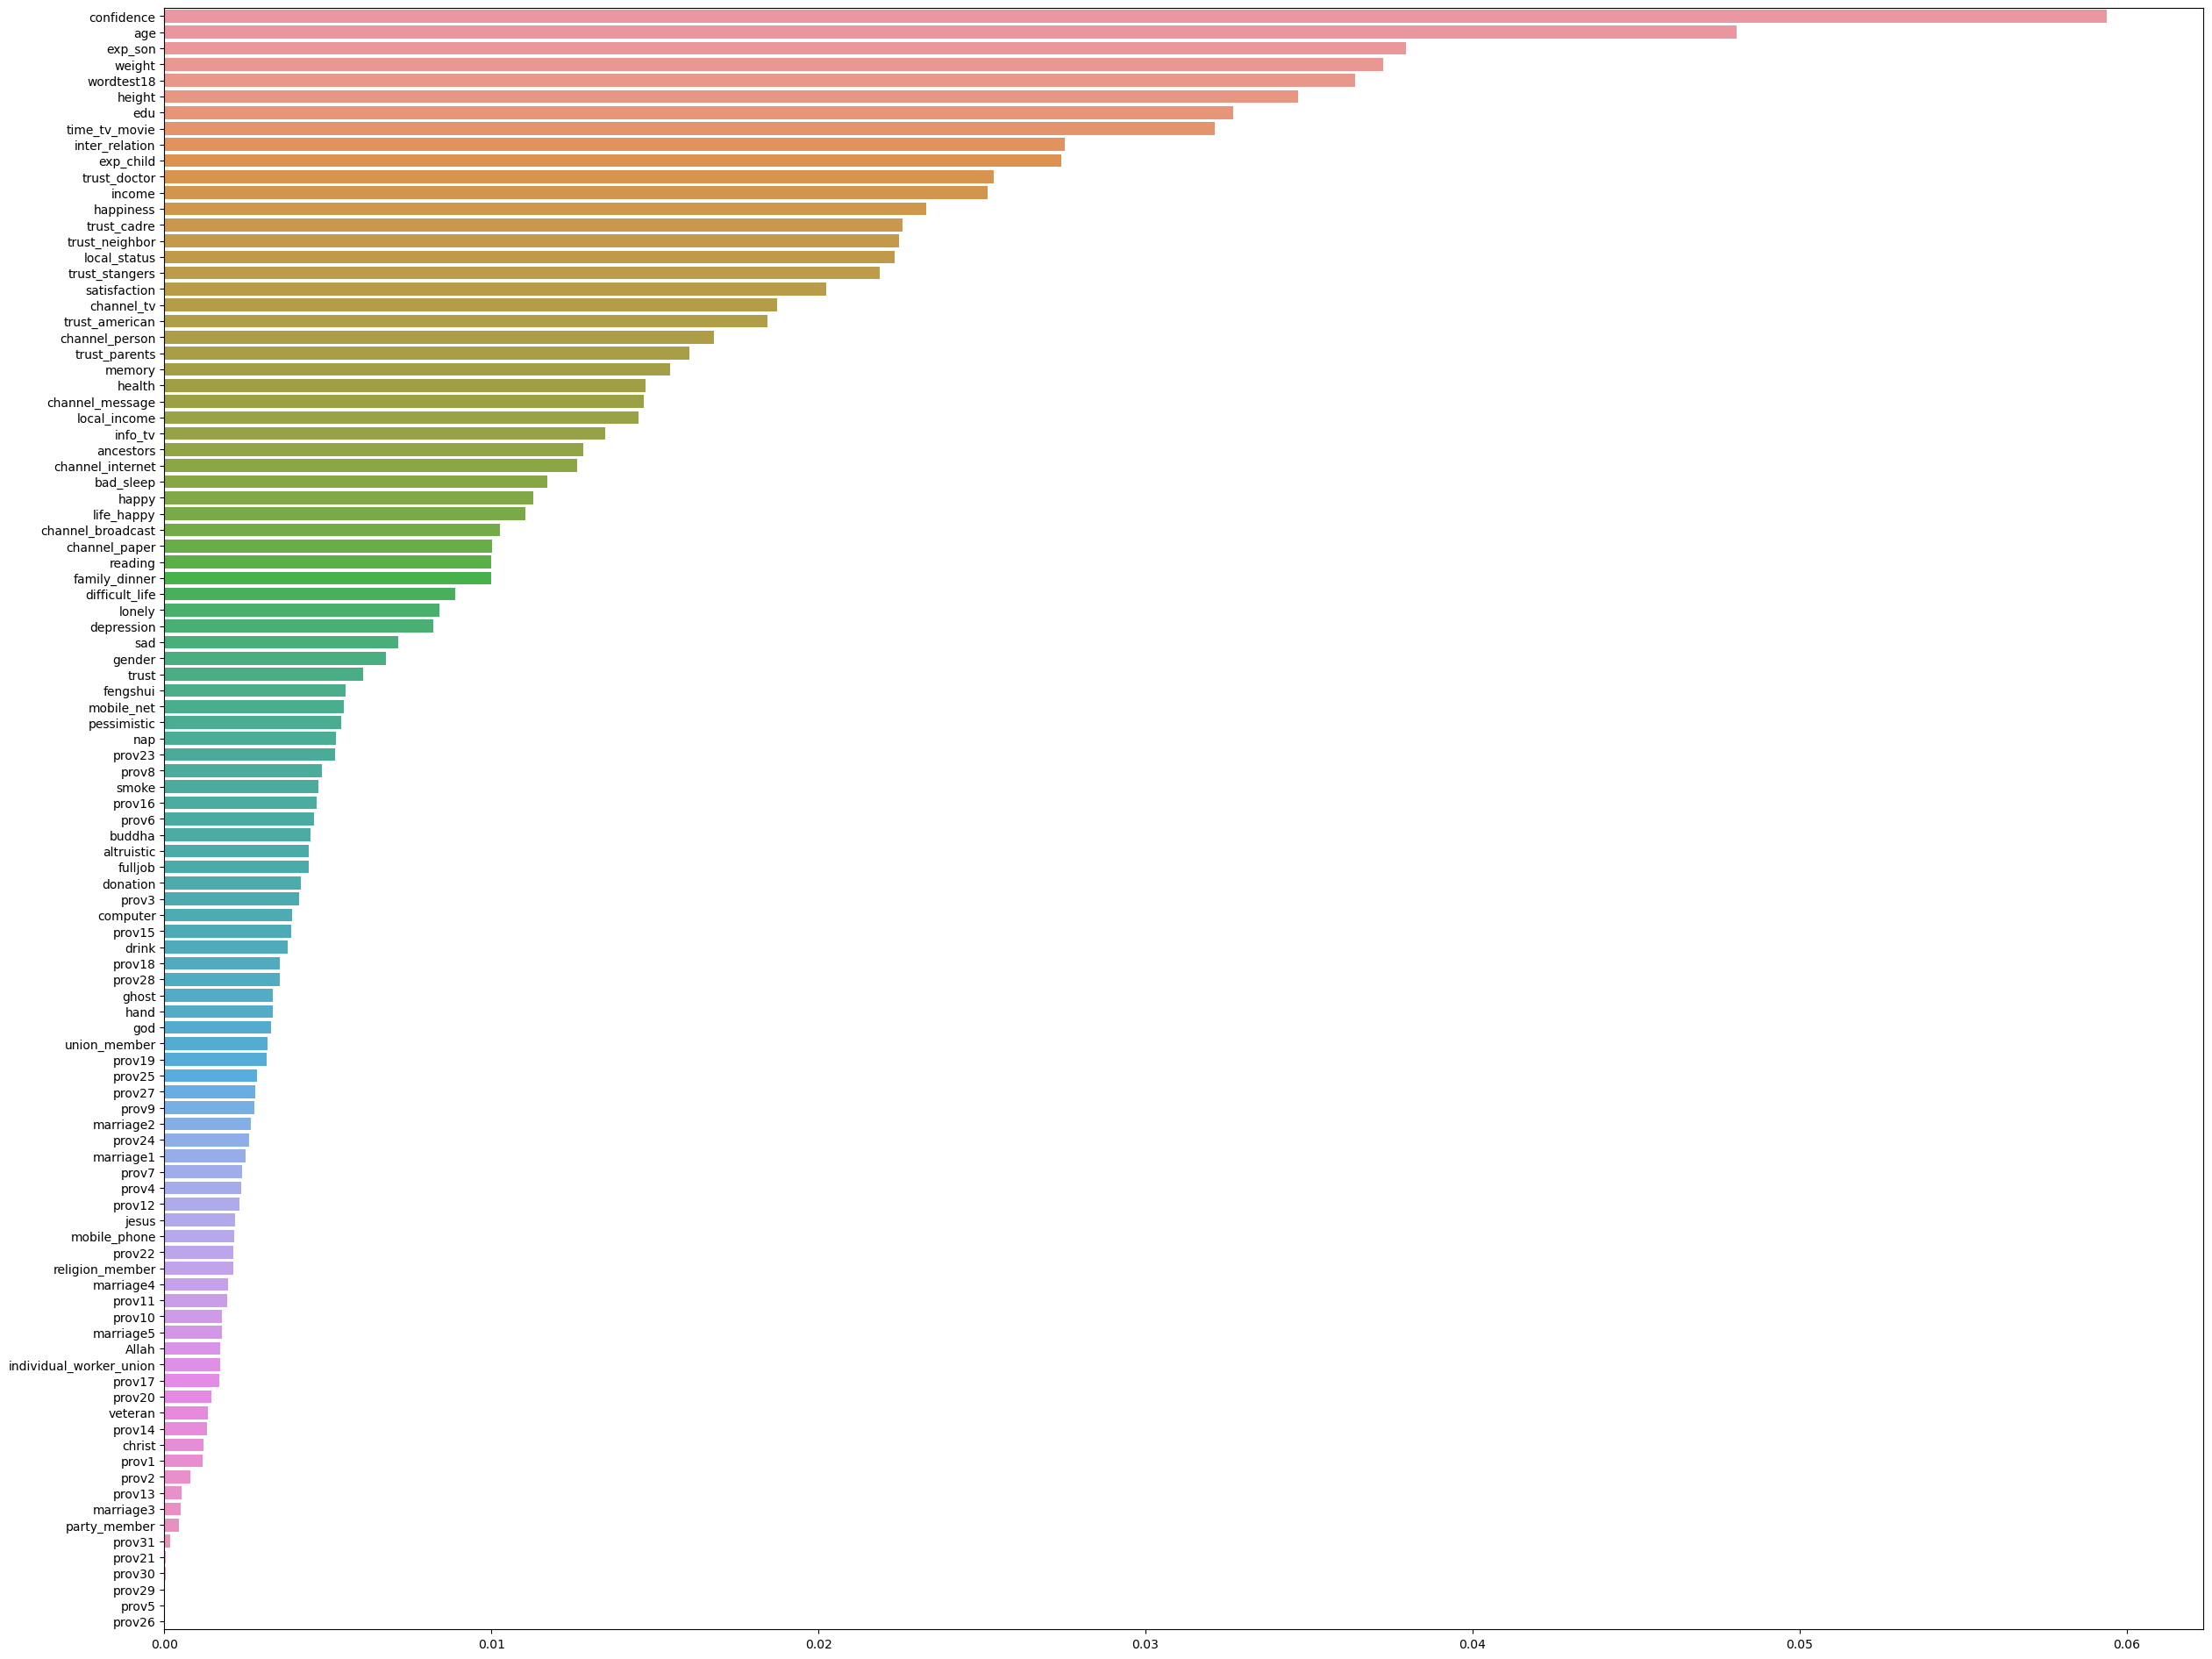

In [11]:
rf_social = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_social.fit(x3, y3)
#rf.feature_importances_
feature_scores3 = pd.Series(rf_social.feature_importances_, index=x3.columns).sort_values(ascending=False)
f3, ax3 = plt.subplots(figsize=(30, 24))
ax3 = sns.barplot(x=feature_scores3, y=feature_scores3.index)
plt.show()